# Lecture 02

Jupyter Notebook - Ottawa River Temperature

Marcel Turcotte (School of Electrical Engineering and Computer Science,
University of Ottawa)  
2024-08-29

In this example, we utilize the [**Ottawa River
Temperature**](https://open.ottawa.ca/documents/2dff4bca304f4308996681aa6265f64d/about)
dataset, available through the [City of Ottawa’s Open Data
portal](https://open.ottawa.ca).

# Quick Start

## Play with this notebook online without having to install anything

While the specifics of the code will be discussed in subsequent
notebooks, it is important to note that this notebook requires the
installation of both [pandas](https://pandas.pydata.org) and
[matplotlib](https://matplotlib.org). These libraries are pre-installed
on [Google Colab](https://colab.research.google.com), facilitating
immediate use.

-   [Open in Google Colab]()

If you are viewing this document on the course website, you can download
the corresponding Jupyter Notebook from the table of contents, usually
located in the upper right corner when browsing on a computer.
Alternatively, you can download it directly
[here](01_ottawa_river_temperature.ipynb).

## Look at this notebook, without executing any code

-   [Open in nbrender]()

# Concepts

A Jupyter notebook is an interactive computational environment that
combines code execution, text, and multimedia in a single document.
Below are the key components of a Jupyter notebook:

## Cells

-   **Code Cells:** These cells contain executable code, typically in
    Python, but other languages like R, Julia, and Scala are also
    supported. The code is executed in the kernel, and the output is
    displayed directly below the cell.
-   **Markdown Cells:** These cells contain text formatted using
    Markdown. They are used to add explanations, headers, bullet points,
    links, images, and other formatted text to the notebook.
-   **Raw Cells:** These cells contain text that is not meant to be
    executed or rendered. They are useful for including code snippets or
    text that should remain unformatted.

## Execution

-   **Standard Output:** The output of code execution, including text,
    tables, and plots, is displayed directly below the code cell.
-   **Rich Media Output:** Jupyter notebooks support rich media output
    such as HTML, images, videos, LaTeX, and interactive widgets (e.g.,
    Plotly, Bokeh).

# Ottawa River Temperature

A Jupyter notebook typically alternates between Markdown cells, which
provide commentary and explanations, and code cells, which contain
executable code. The sequence in which cells are executed is crucial.
For example, before utilizing functions from a library, the library must
first be imported. Similarly, if you modify the start of the year range,
you must execute the code cell that defines this change before executing
the cell responsible for drawing the plot.

## Importing the necessary librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO

## Fetching the data

> **Warning**
>
> When working with Google Colab, it is essential to recognize that you
> are operating within a temporary environment. Any data or changes made
> will be deleted after the session ends. Therefore, it is imperative to
> download and securely store any data or results that you wish to
> retain.
>
> You are also responsible for ensuring that the source code for your
> assignments remains private and is not publicly accessible.

In [2]:
# URL of the Excel file
url = 'https://www.arcgis.com/sharing/rest/content/items/2dff4bca304f4308996681aa6265f64d/data'

# Fetch the Excel file from the web
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

## Reading the Excel file

In [3]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(BytesIO(response.content), sheet_name='Britannia raw water temperature', header=None)

## Extracting the data from the Excel file

Columns B to U contain daily average temperatures for each year from
2005 to 2023, with each column corresponding to a specific year. Rows 11
to 375 represent daily average values, where row 11 corresponds to
January 1 and row 375 corresponds to December 31. For example, cell B11
contains the average temperature for January 1, 2005, while cell U375
contains the average temperature for December 31, 2023.

In [4]:
# Define the range of years and columns
years = range(2005, 2023 + 1)  # Up to 2023 as per your description
columns = range(1, 21)  # Columns B to U (1-indexed in Excel, 0-indexed in pandas)

# Prepare a dictionary to hold the data
data = {}

# Extract data for each year
for year, col in zip(years, columns):
    # Note: B11 to B375 corresponds to row indices 10 to 374 in pandas (0-indexed)
    data[year] = df.iloc[10:375, col].values

## Ploting the data

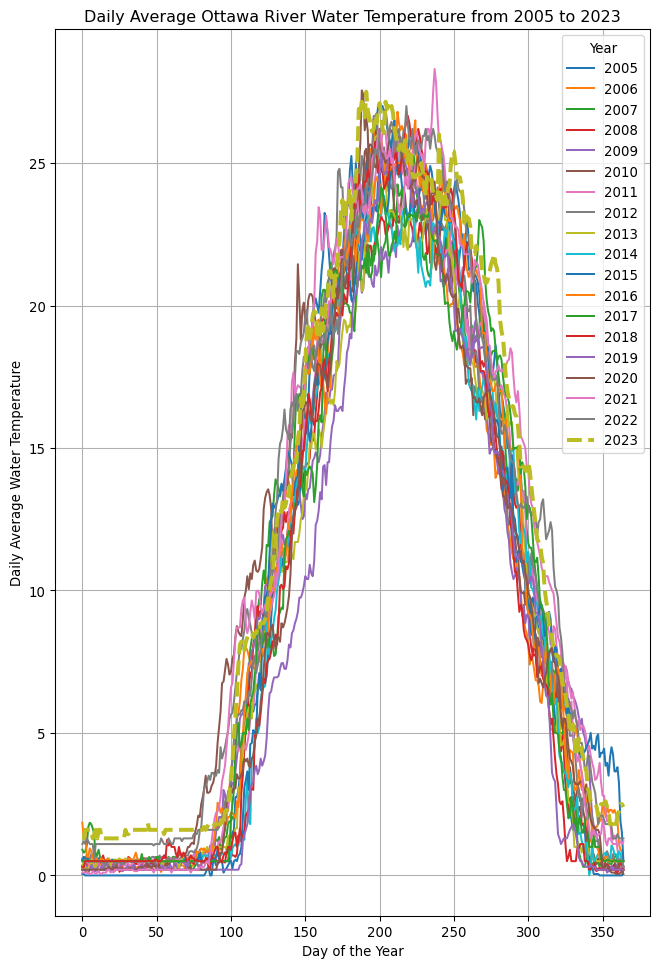

In [5]:
# Plot the data
plt.figure(figsize=(8, 12))

for year in years:
  if year == 2023:
    plt.plot(data[year], label=str(year), linewidth=3, linestyle='--')
  else:
    plt.plot(data[year], label=str(year))

plt.xlabel('Day of the Year')
plt.ylabel('Daily Average Water Temperature')
plt.title('Daily Average Ottawa River Water Temperature from 2005 to 2023')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Play around

Familiarize yourself with the technology.

1.  Change the year range, say from 2000 until 2023, and redraw the
    plot.
2.  Consult the
    [documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
    and change the line style.